In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings


from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/Air_Traffic_Passenger_Statistics.csv", sep=',')
data.shape  

(15007, 17)

In [3]:
data.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
data.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [5]:
data.columns

Index(['index', 'Activity Period', 'Operating Airline',
       'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

In [7]:
data.isnull().sum()

index                           0
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.drop('index',axis=1,inplace=True)
data.drop('Operating Airline',axis=1,inplace=True)
data.drop('Published Airline',axis=1,inplace=True)

In [10]:
data_onehot = pd.get_dummies(data, drop_first= True)

In [11]:
data_onehot.shape

(14953, 175)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data_onehot)
data_scaled = scaling.transform(data_onehot)

In [13]:
data_scaled = pd.DataFrame(data_scaled, columns= data_onehot.columns)

## Cluster Analysis

### MiniBatch K-MEANs Algorithm

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import homogeneity_score


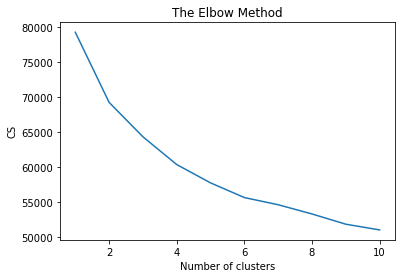

In [15]:
# Use elbow method to find optimal number of clusters

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [17]:

kMeans = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=6)
data_scaled["Cluster"] = kMeans.fit_predict(data_scaled)

In [18]:
labels_pred = data_scaled["Cluster"]

In [20]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.15767656244506562
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.8480910891481372
--------------------------------------------------------------


### Aglomarative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=6, linkage="ward")
data_scaled["Cluster"] = clustering_model.fit_predict(data_scaled)

In [22]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.12470485787418994
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.8283357778970017
--------------------------------------------------------------


### DBSCAN Model

In [23]:
from sklearn.cluster import DBSCAN
epsilon = 1.0
min_samples = 13

labels = DBSCAN(eps=epsilon, min_samples=min_samples).fit_predict(data_scaled)

In [24]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.12470485787418994
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.8283357778970017
--------------------------------------------------------------


### OPTICS Model

In [25]:
from sklearn.cluster import OPTICS

labels = OPTICS(min_samples=3).fit_predict(data_scaled)

In [30]:
score = silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.5154474589262096
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 1.8283357778970017
--------------------------------------------------------------


### Mean Shift Model

In [28]:
from sklearn.cluster import MeanShift

labels = MeanShift().fit_predict(data_scaled)

KeyboardInterrupt: 

In [ ]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")